In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm.auto import tqdm
from tabulate import tabulate
import shap

pd.set_option('display.max_columns', None)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_ground_pol = pd.read_excel("D:\\Machine_Learning_Code_for_PHD\Dataset\\Ground Station Pollution Dataset.xlsx")
df_ground_wea = pd.read_excel("D:\\sample10.xlsx")
df_sat_wea = pd.read_excel("D:\\Machine_Learning_Code_for_PHD\\Dataset\\Satellite Weather Dataset.xlsx")
#df_sat_pol= pd.read_excel("D:\\Main Dataset\\Total number of Admission Datasets\\SatPollution.xlsx")
#df_ground_J_pol= pd.read_excel("D:\\Machine_Learning_Code_for_PHD\\Dataset\\GroundPollution J.xlsx")
df_dieasease_C= pd.read_excel("D:\\Machine_Learning_Code_for_PHD\\Ground station Dataset\\GSDiesease&Pollution wise dataset\\GroundPollutionC.xlsx")

In [4]:
df_dieasease_C.head()

,PM2.5 (ug/m3),PM10 (ug/m3),O3 (ug/m3),SO2 (ug/m3),NO2 (ug/m3),CO (ug/m3),OP
0,8.833333,16.800000,65.415625,1.468750,21.877778,0.269985,0
1,9.700000,17.666667,56.066667,0.612500,26.459722,0.291435,1
2,10.633333,19.766667,50.089583,0.862500,34.730556,0.291719,3
3,15.366667,33.666667,45.613194,0.922917,42.902778,0.345973,4
4,16.233333,32.233333,45.715625,2.050000,49.408333,0.313269,6


In [5]:
def check_shapes(*dfs):
    for idx, df in enumerate(dfs, 1):
        print(f"Dataset {idx} shape: {df.shape}")

In [6]:
# Check shapes of each dataset
check_shapes(df_dieasease_C, df_ground_pol, df_ground_wea, df_sat_wea)

Dataset 1 shape: (3287, 7)
Dataset 2 shape: (3287, 17)
Dataset 3 shape: (3287, 6)
Dataset 4 shape: (3287, 6)


In [7]:
def dataset_statistics(df):
    num_rows = df.shape[0]
    num_columns = df.shape[1]
    column_names = df.columns.tolist()
    data_types = df.dtypes.value_counts()

    # Print the statistics
    print(f"Total rows: {num_rows}\n")
    print(f"Total columns: {num_columns}\n")
    print(f"Column names: {column_names}\n")
    print("Any Duplicated Values: {}\n".format(df.duplicated().any())) # check duplicated values
    print("Data types:")
    print(data_types)

In [8]:
names = ['Diesease_C','Ground Pollution', 'Ground Weather', 'Satelite Weather']
for idx, df in enumerate([df_dieasease_C, df_ground_pol, df_ground_wea, df_sat_wea]):
    print("="*100)
    print(f"\t\tDataset {idx+1}: {names[idx]}")
    print("="*100)
    dataset_statistics(df)

		Dataset 1: Diesease_C
Total rows: 3287

Total columns: 7

Column names: ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'O3 (ug/m3)', 'SO2 (ug/m3)', 'NO2 (ug/m3)', 'CO (ug/m3)', 'OP']

Any Duplicated Values: False

Data types:
float64    6
int64      1
dtype: int64
		Dataset 2: Ground Pollution
Total rows: 3287

Total columns: 17

Column names: ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'O3 (ug/m3)', 'SO2 (ug/m3)', 'NO2 (ug/m3)', 'CO (ug/m3)', 'OP', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']

Any Duplicated Values: False

Data types:
float64    16
int64       1
dtype: int64
		Dataset 3: Ground Weather
Total rows: 3287

Total columns: 6

Column names: ['Temperature', 'Dew Temperature', 'Surface Pressure', 'Velocity', 'Relative Humidity', 'OP']

Any Duplicated Values: False

Data types:
float64    5
int64      1
dtype: int64
		Dataset 4: Satelite Weather
Total rows: 3287

Total columns: 6

Column names: ['

In [9]:
def check_dtypes(df):
    return df.dtypes.to_frame().rename(columns={0:'dtypes'})

In [10]:
names = ['Diesease_C','Ground Pollution', 'Ground Weather', 'Satelite Weather']
for idx, df in enumerate([df_dieasease_C, df_ground_pol, df_ground_wea, df_sat_wea]):
    print("="*100)
    print(f"\t\tDataset {idx+1}: {names[idx]}")
    print("="*100)
    print(check_dtypes(df))

		Dataset 1: Diesease_C
                dtypes
PM2.5 (ug/m3)  float64
PM10 (ug/m3)   float64
O3 (ug/m3)     float64
SO2 (ug/m3)    float64
NO2 (ug/m3)    float64
CO (ug/m3)     float64
OP               int64
		Dataset 2: Ground Pollution
                dtypes
PM2.5 (ug/m3)  float64
PM10 (ug/m3)   float64
O3 (ug/m3)     float64
SO2 (ug/m3)    float64
NO2 (ug/m3)    float64
CO (ug/m3)     float64
OP               int64
Unnamed: 7     float64
Unnamed: 8     float64
Unnamed: 9     float64
Unnamed: 10    float64
Unnamed: 11    float64
Unnamed: 12    float64
Unnamed: 13    float64
Unnamed: 14    float64
Unnamed: 15    float64
Unnamed: 16    float64
		Dataset 3: Ground Weather
                    dtypes
Temperature        float64
Dew Temperature    float64
Surface Pressure   float64
Velocity           float64
Relative Humidity  float64
OP                   int64
		Dataset 4: Satelite Weather
                    dtypes
Temperature        float64
Dew Temperature    float64
Surface Pressure   f

In [11]:
def check_unique_values(df):
  # Calculate the count of unique values for each column
  unique_value_counts = df.nunique()
  unique_counts_df = pd.DataFrame({'Column': unique_value_counts.index, 'Unique Count': unique_value_counts.values})
  print(tabulate(unique_counts_df, headers = 'keys', tablefmt = 'psql'))

In [12]:
names = ['Diesease_C','Ground Pollution', 'Ground Weather', 'Satelite Weather']
for idx, df in enumerate([df_dieasease_C, df_ground_pol, df_ground_wea, df_sat_wea]):
    print("="*100)
    print(f"\t\tDataset {idx+1}: {names[idx]}")
    print("="*100)
    check_unique_values(df)

		Dataset 1: Diesease_C
+----+---------------+----------------+
|    | Column        |   Unique Count |
|----+---------------+----------------|
|  0 | PM2.5 (ug/m3) |           2428 |
|  1 | PM10 (ug/m3)  |           2664 |
|  2 | O3 (ug/m3)    |           3231 |
|  3 | SO2 (ug/m3)   |           2193 |
|  4 | NO2 (ug/m3)   |           3144 |
|  5 | CO (ug/m3)    |           3019 |
|  6 | OP            |             16 |
+----+---------------+----------------+
		Dataset 2: Ground Pollution
+----+---------------+----------------+
|    | Column        |   Unique Count |
|----+---------------+----------------|
|  0 | PM2.5 (ug/m3) |           2428 |
|  1 | PM10 (ug/m3)  |           2664 |
|  2 | O3 (ug/m3)    |           3231 |
|  3 | SO2 (ug/m3)   |           2193 |
|  4 | NO2 (ug/m3)   |           3144 |
|  5 | CO (ug/m3)    |           3019 |
|  6 | OP            |             60 |
|  7 | Unnamed: 7    |              0 |
|  8 | Unnamed: 8    |              0 |
|  9 | Unnamed: 9    |    

In [13]:
def get_overall_info_about_dataset(df):
    '''
    lets try to check the percentage of missing values,unique values,percentage of one catagory values
    and type against each column.
    '''
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
    df_ = stats_df.sort_values('% MissingValues', ascending=False)
    print(tabulate(df_, headers = 'keys', tablefmt = 'psql'))

In [14]:
names = ['Diesease_C', 'Ground Pollution', 'Ground Weather', 'Satelite Weather']
for idx, df in enumerate([df_dieasease_C, df_ground_pol, df_ground_wea, df_sat_wea]):
    print("="*100)
    print(f"\t\tDataset {idx+1}: {names[idx]}")
    print("="*100)
    get_overall_info_about_dataset(df)

		Dataset 1: Diesease_C
+----+---------------+-----------------+-------------------+------------------------------+---------+
|    | Feature       |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type    |
|----+---------------+-----------------+-------------------+------------------------------+---------|
|  0 | PM2.5 (ug/m3) |            2428 |                 0 |                    0.334652  | float64 |
|  1 | PM10 (ug/m3)  |            2664 |                 0 |                    0.243383  | float64 |
|  2 | O3 (ug/m3)    |            3231 |                 0 |                    0.456343  | float64 |
|  3 | SO2 (ug/m3)   |            2193 |                 0 |                    1.0648    | float64 |
|  4 | NO2 (ug/m3)   |            3144 |                 0 |                    0.0912686 | float64 |
|  5 | CO (ug/m3)    |            3019 |                 0 |                    2.7989    | float64 |
|  6 | OP            |              16 |                 0

In [15]:
def plot_numeric_cols(df, numeric_features):
    num_plots = len(numeric_features)
    rows = num_plots // 4 + (num_plots % 4 > 0)  # Calculate the number of rows needed
    fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(20, 5 * rows))  # Adjust the figure size here
    plt.suptitle('Data distribution in numerical columns', fontsize=20, fontweight='bold', y=1.02)

    for i, col in enumerate(numeric_features):
        row_index = i // 4
        col_index = i % 4
        ax = axes[row_index, col_index]
        sns.histplot(df[col], bins=20, kde=True, ax=ax)
        ax.axvline(df[col].mean(), color='blue', linestyle='dashed', linewidth=2, label='mean')
        ax.axvline(df[col].median(), color='red', linestyle='dotted', linewidth=2, label='median')
        ax.set_title(col)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend()

    # Remove empty subplots
    for i in range(num_plots, rows * 4):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

		Dataset 1: Diesease_C


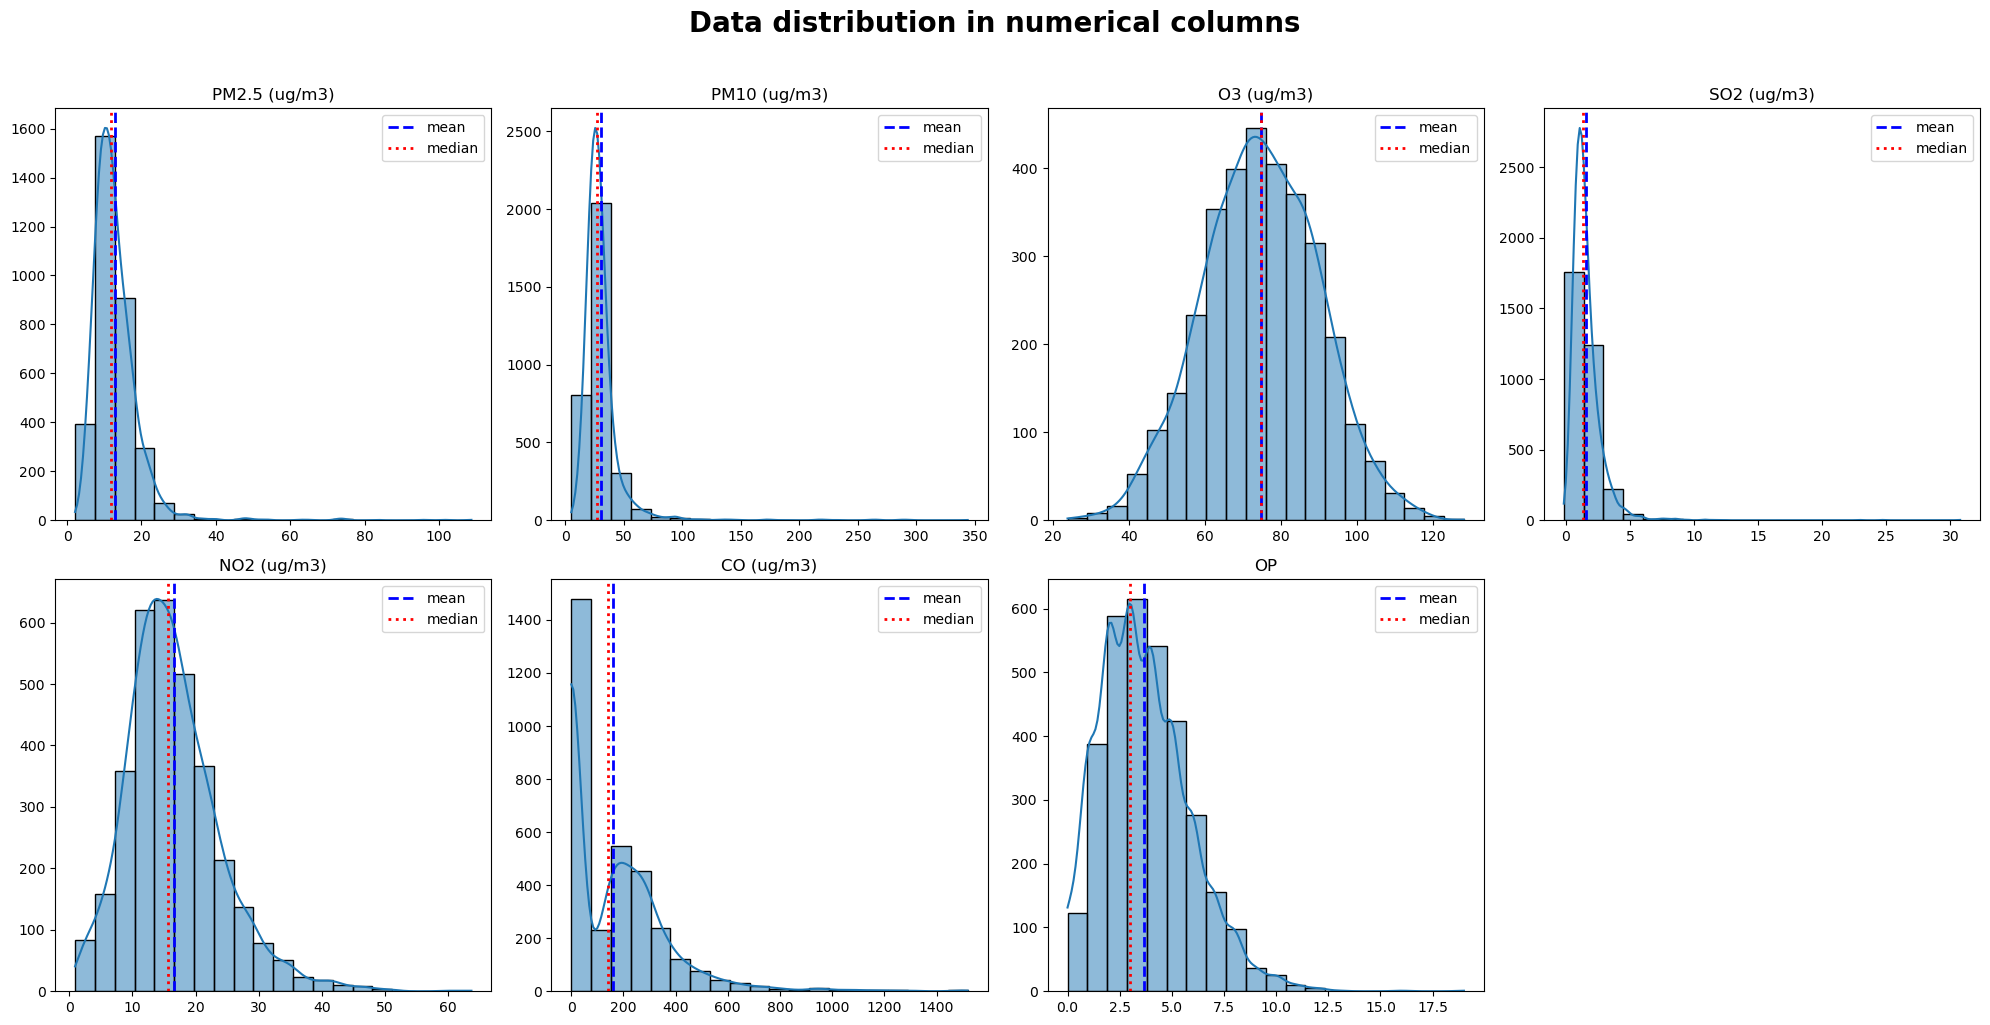

		Dataset 2: Ground Pollution


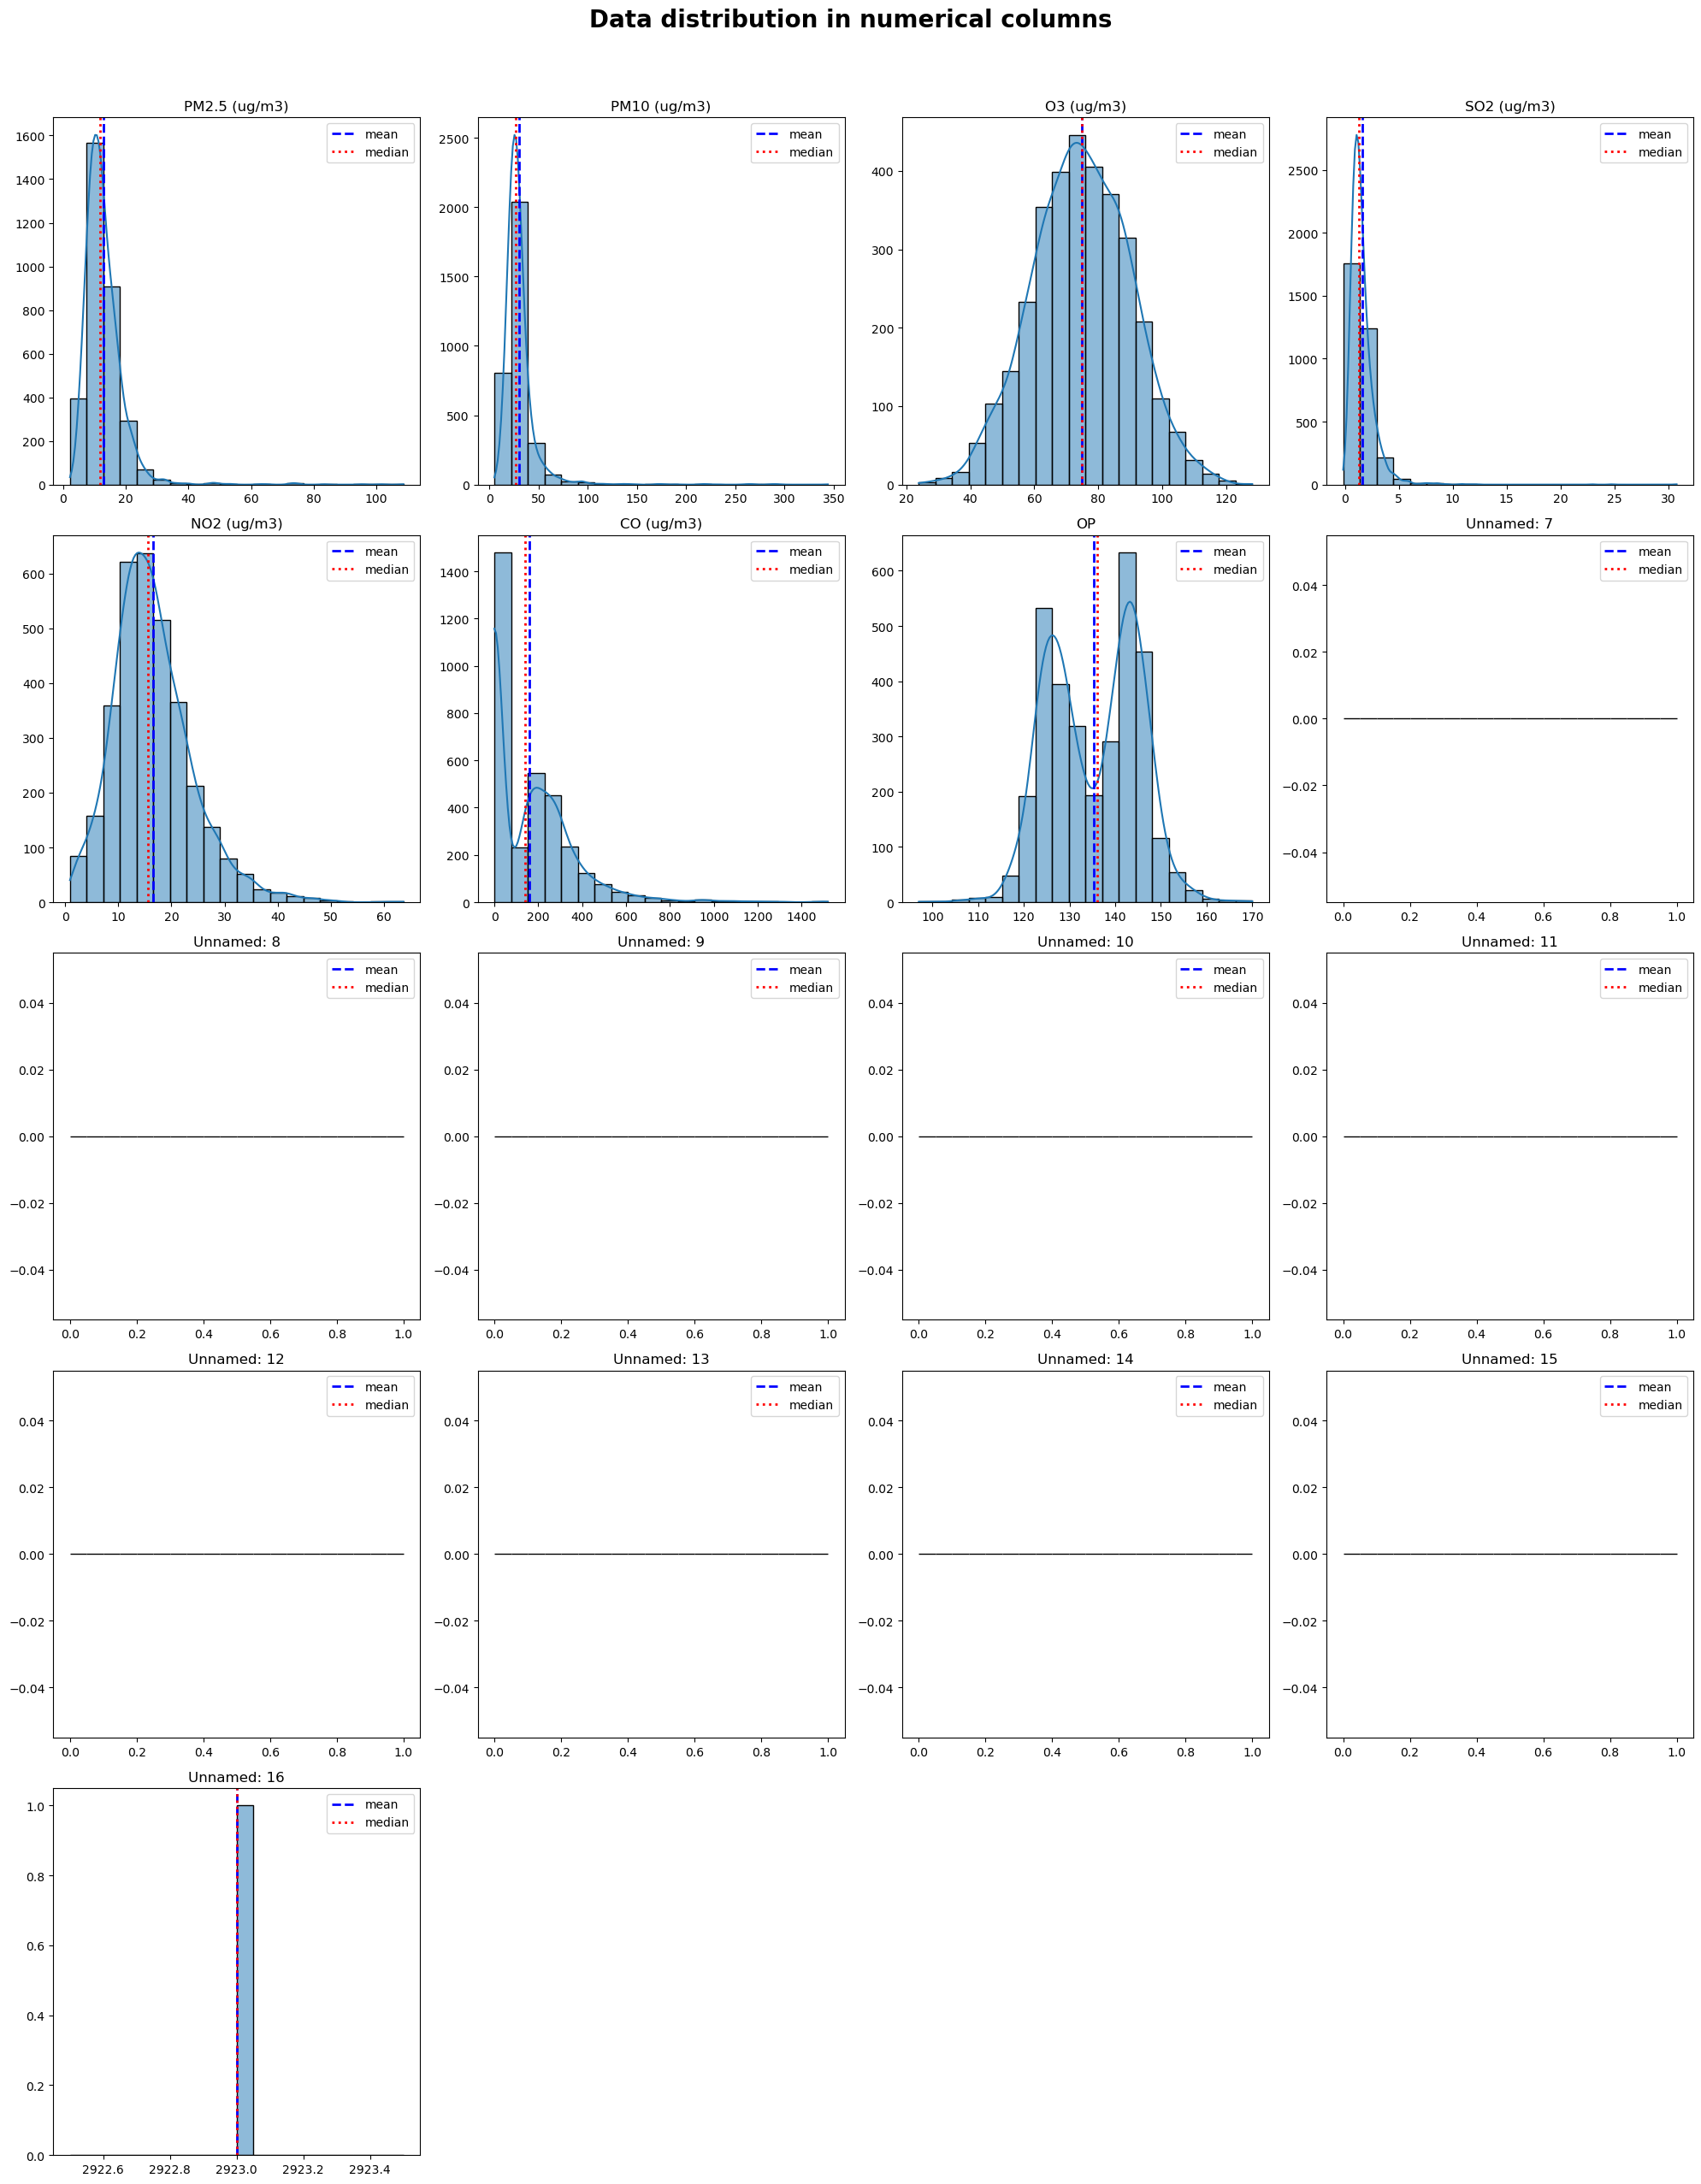

		Dataset 3: Ground Weather


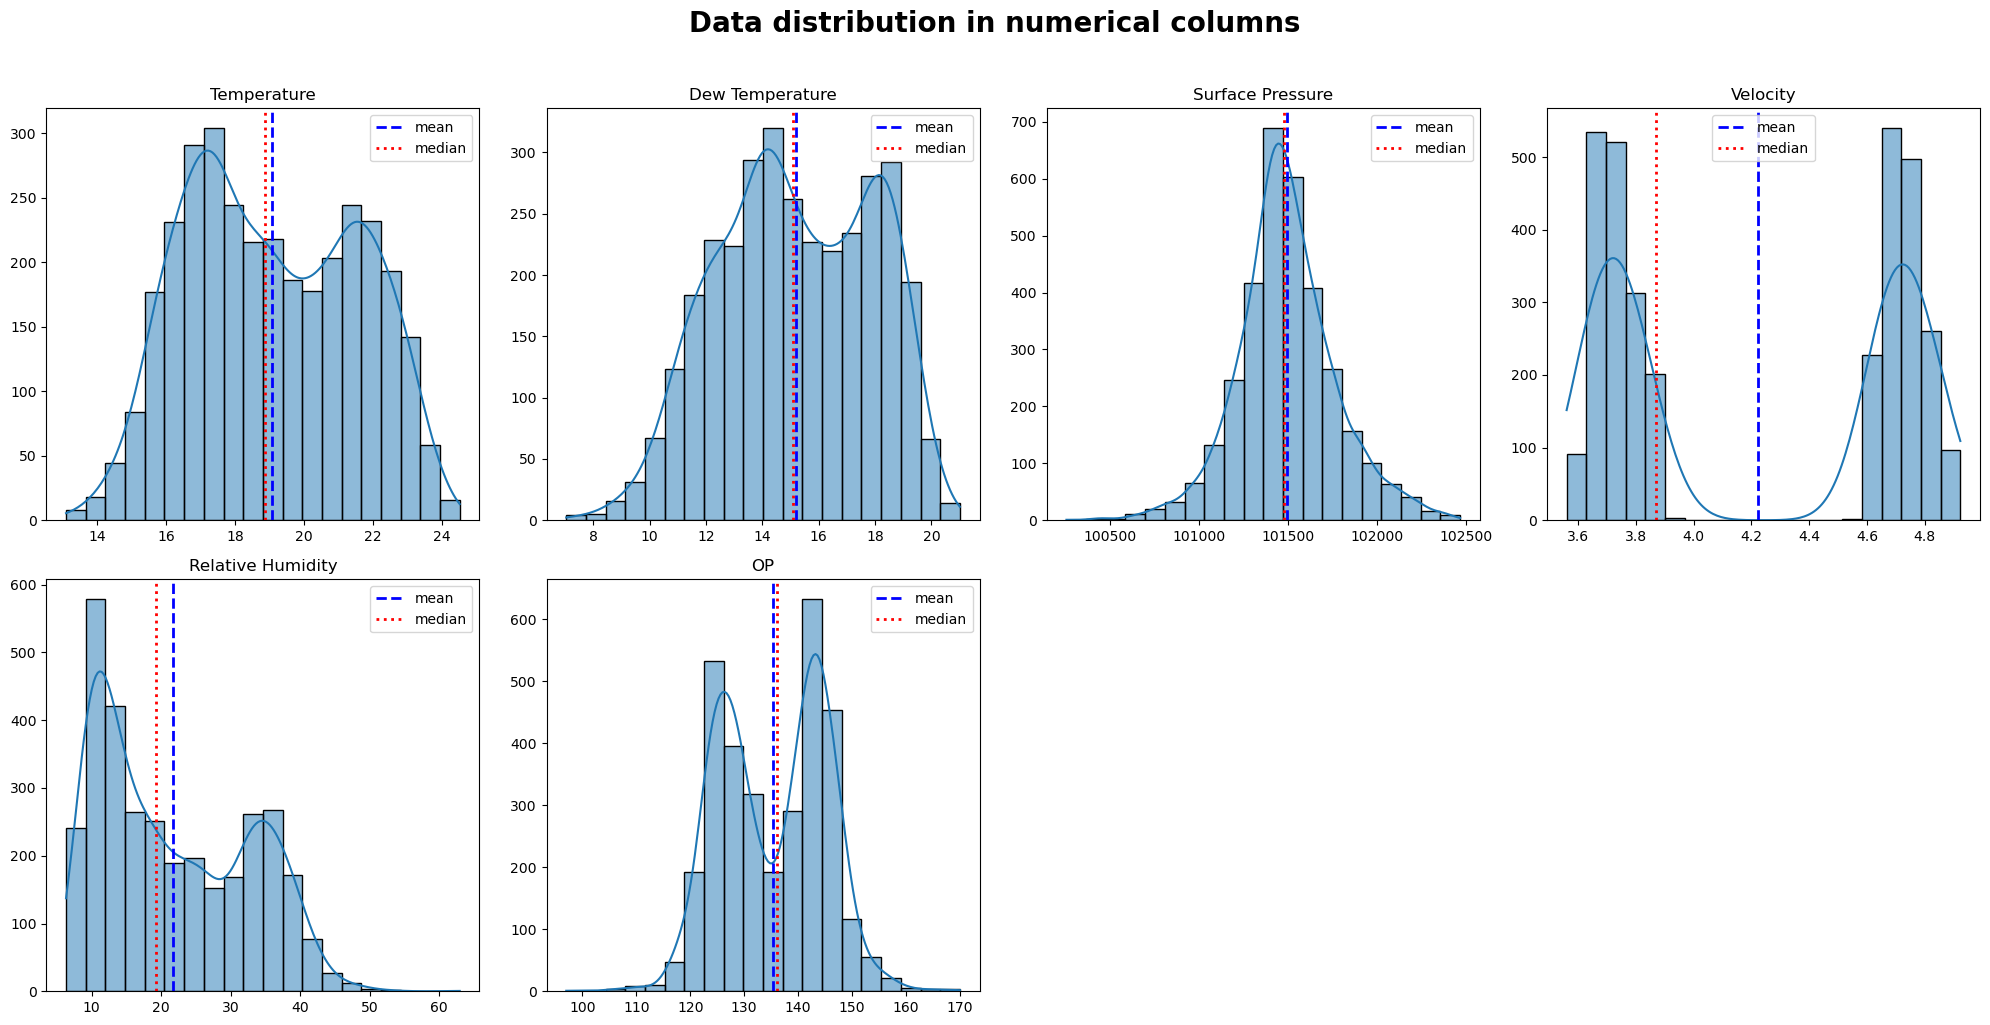

		Dataset 4: Satelite Weather


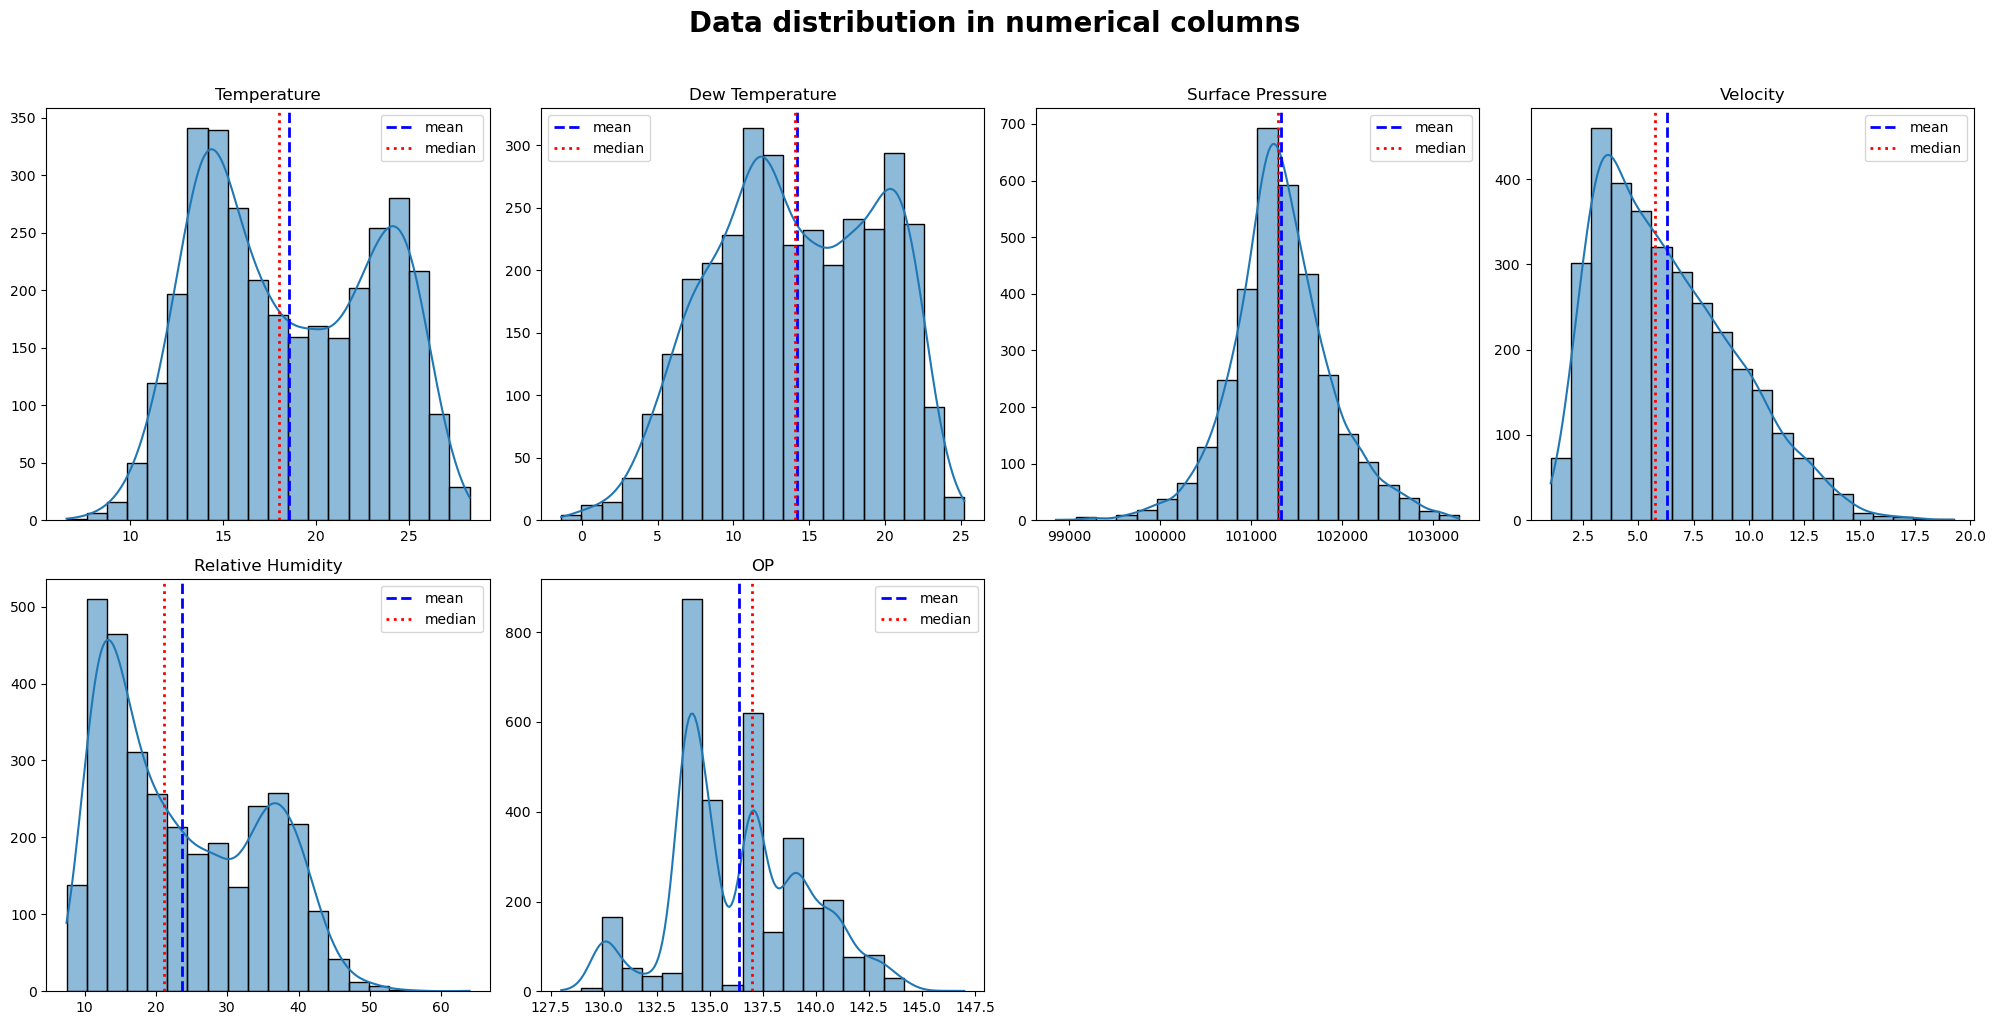

In [16]:
names = ['Diesease_C', 'Ground Pollution', 'Ground Weather', 'Satelite Weather']
for idx, df in enumerate([df_dieasease_C, df_ground_pol, df_ground_wea, df_sat_wea]):
    print("="*100)
    print(f"\t\tDataset {idx+1}: {names[idx]}")
    print("="*100)
    plot_numeric_cols(df, df.select_dtypes(include=['int64', 'float64']).columns)

In [17]:
def check_correlation(df, col):
    # Calculate the correlation matrix
    correlation_matrix = df.corr()[[f'{col}']].sort_values(by=f'{col}', ascending=False)
    correlation_matrix = correlation_matrix.rename(columns={f'{col}': f'Correlation with {col}'})

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Heatmap with {col}')
    plt.show()

    # Print the correlation matrix
    print("Correlation Matrix:")
    print(tabulate(correlation_matrix, headers = 'keys', tablefmt = 'psql'))

		Dataset 1: Diesease_C


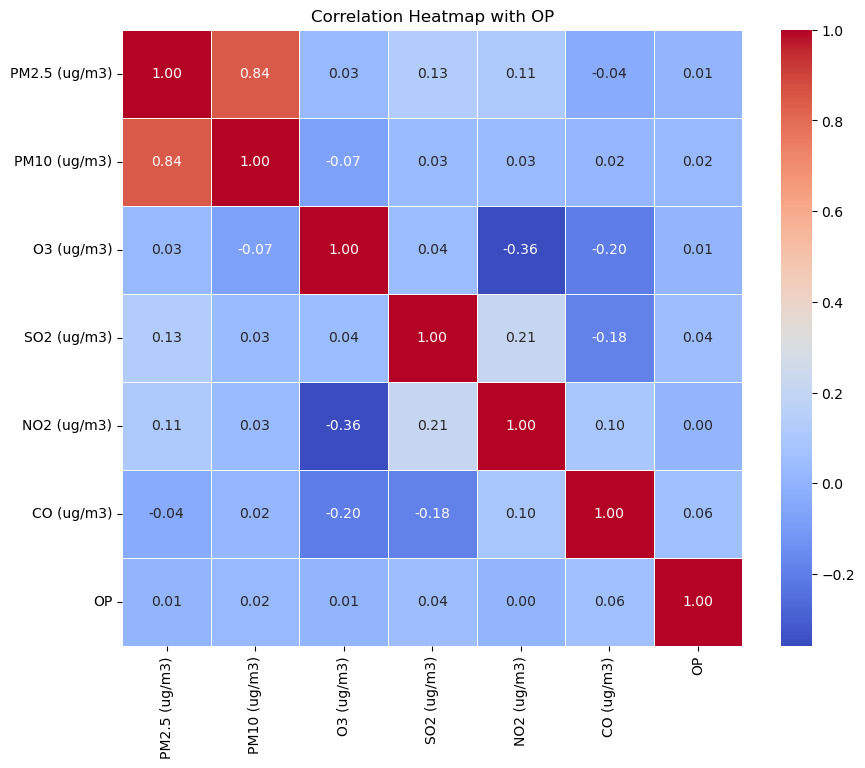

Correlation Matrix:
+---------------+-----------------------+
|               |   Correlation with OP |
|---------------+-----------------------|
| OP            |            1          |
| CO (ug/m3)    |            0.0581989  |
| SO2 (ug/m3)   |            0.0412287  |
| PM10 (ug/m3)  |            0.0243553  |
| PM2.5 (ug/m3) |            0.00655019 |
| O3 (ug/m3)    |            0.00608372 |
| NO2 (ug/m3)   |            0.00374716 |
+---------------+-----------------------+
		Dataset 2: Ground Pollution


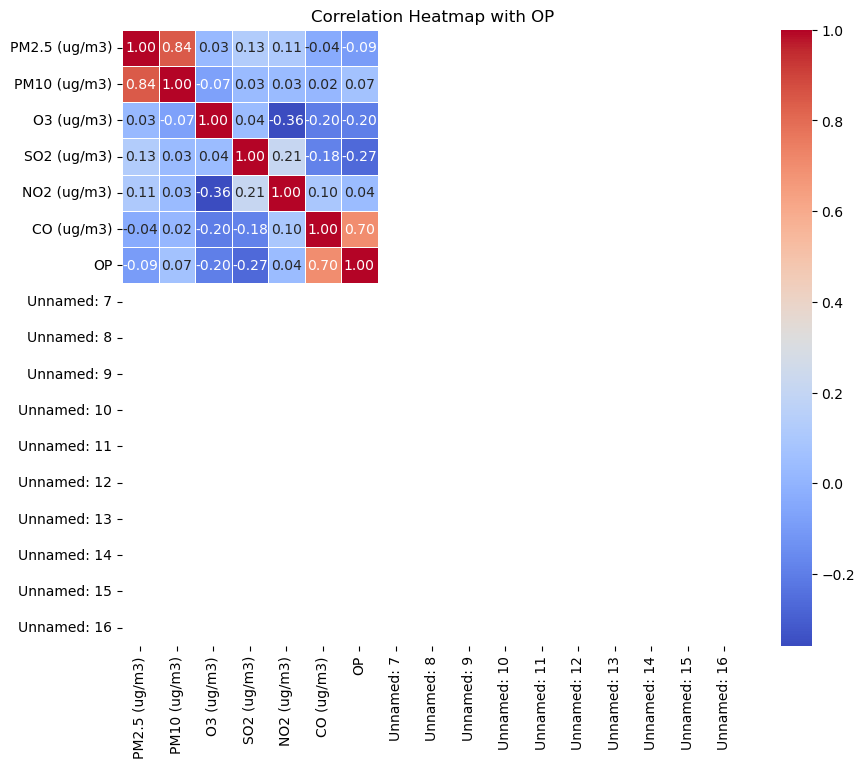

Correlation Matrix:
+---------------+-----------------------+
|               |   Correlation with OP |
|---------------+-----------------------|
| OP            |             1         |
| CO (ug/m3)    |             0.702446  |
| PM10 (ug/m3)  |             0.0665042 |
| NO2 (ug/m3)   |             0.0351128 |
| PM2.5 (ug/m3) |            -0.0932468 |
| O3 (ug/m3)    |            -0.198619  |
| SO2 (ug/m3)   |            -0.267849  |
| Unnamed: 7    |           nan         |
| Unnamed: 8    |           nan         |
| Unnamed: 9    |           nan         |
| Unnamed: 10   |           nan         |
| Unnamed: 11   |           nan         |
| Unnamed: 12   |           nan         |
| Unnamed: 13   |           nan         |
| Unnamed: 14   |           nan         |
| Unnamed: 15   |           nan         |
| Unnamed: 16   |           nan         |
+---------------+-----------------------+
		Dataset 3: Ground Weather


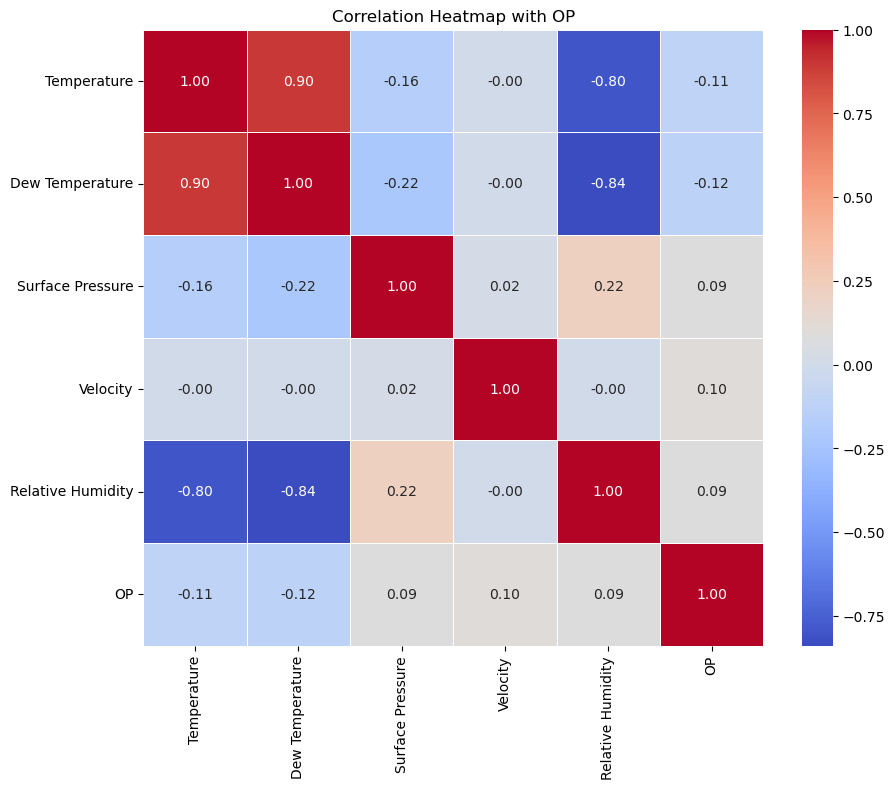

Correlation Matrix:
+-------------------+-----------------------+
|                   |   Correlation with OP |
|-------------------+-----------------------|
| OP                |             1         |
| Velocity          |             0.0992359 |
| Relative Humidity |             0.0871768 |
| Surface Pressure  |             0.0861558 |
| Temperature       |            -0.109925  |
| Dew Temperature   |            -0.121606  |
+-------------------+-----------------------+
		Dataset 4: Satelite Weather


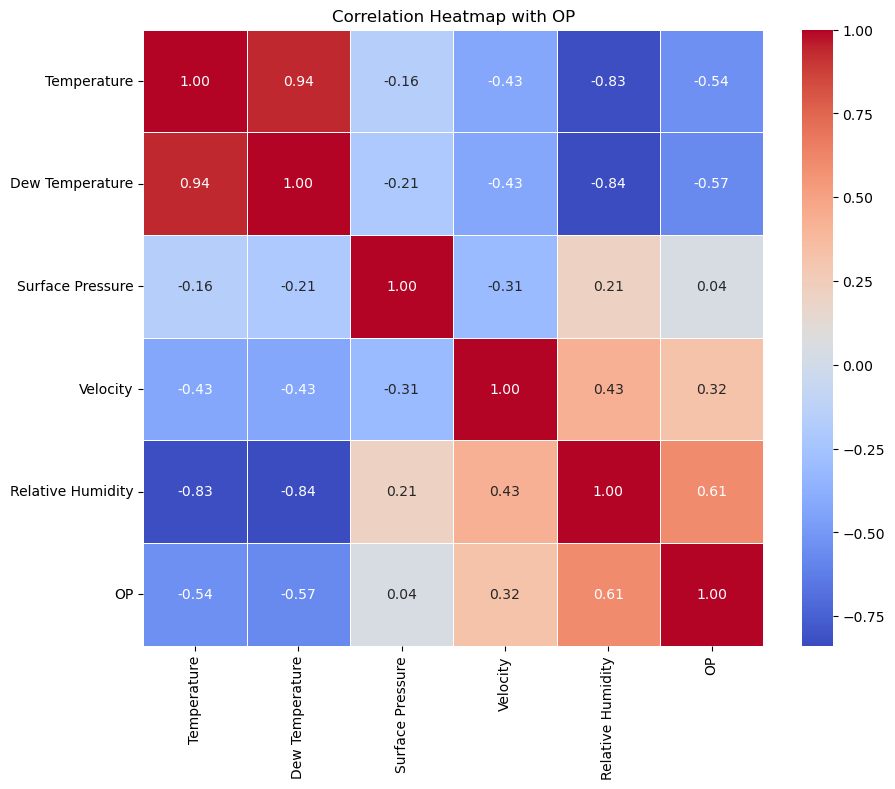

Correlation Matrix:
+-------------------+-----------------------+
|                   |   Correlation with OP |
|-------------------+-----------------------|
| OP                |             1         |
| Relative Humidity |             0.605032  |
| Velocity          |             0.324627  |
| Surface Pressure  |             0.0387987 |
| Temperature       |            -0.539128  |
| Dew Temperature   |            -0.569388  |
+-------------------+-----------------------+


In [18]:
names = ['Diesease_C','Ground Pollution', 'Ground Weather', 'Satelite Weather']
for idx, df in enumerate([df_dieasease_C, df_ground_pol, df_ground_wea, df_sat_wea]):
    print("="*100)
    print(f"\t\tDataset {idx+1}: {names[idx]}")
    print("="*100)
    # Calculate the correlation matrix
    check_correlation(df, 'OP')

In [19]:
def plot_target_distribution(df, target_col):
    plt.figure(figsize=(18, 6))

    # Combined Histogram and KDE Plot
    sns.histplot(df[target_col], kde=True, bins=100)
    plt.xlabel(target_col)
    plt.ylabel('Density')
    plt.title('Distribution of ' + target_col)

    plt.show()

		Dataset 1: Diesease_C


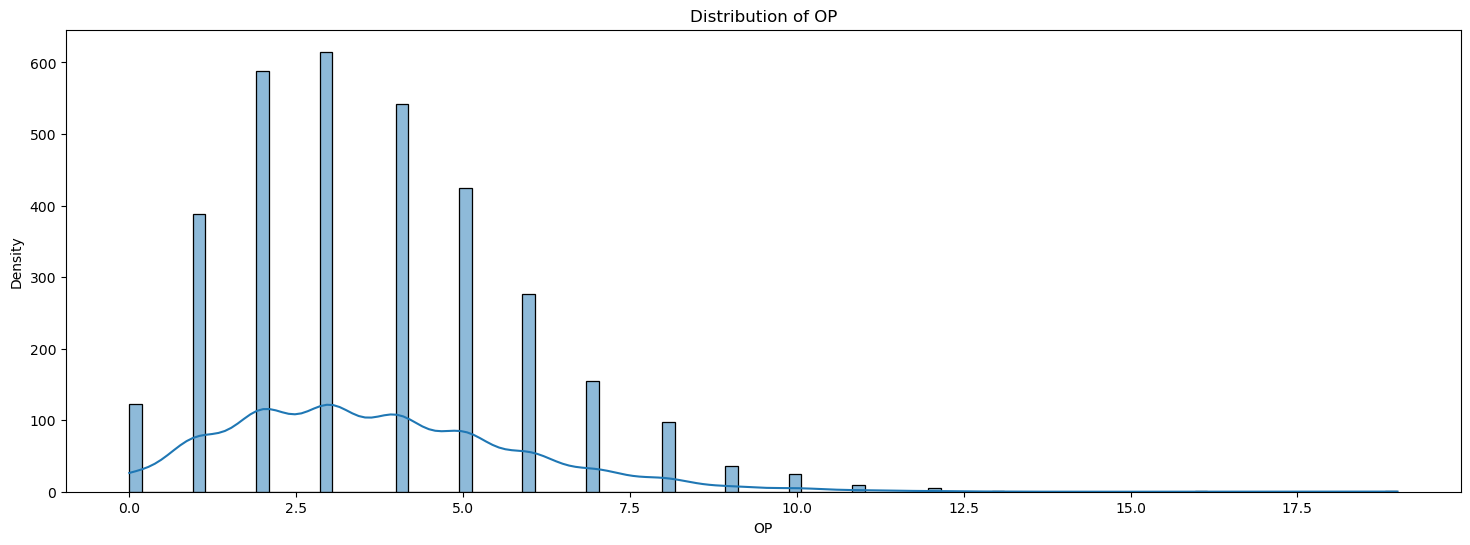

		Dataset 2: Ground Pollution


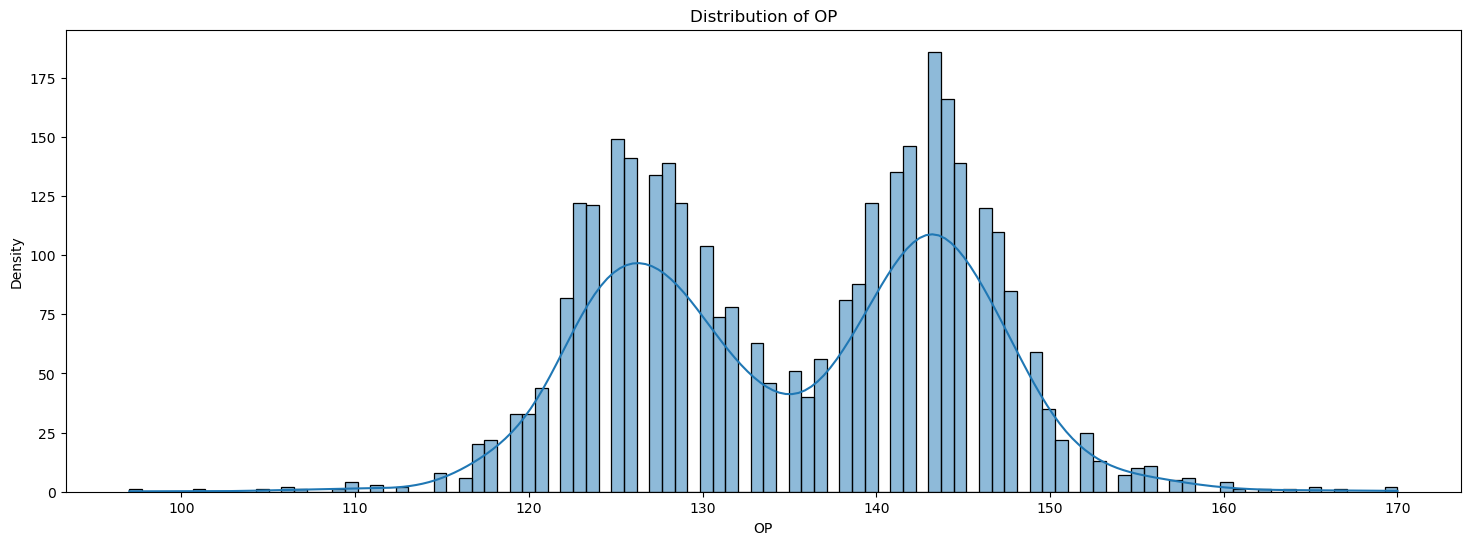

		Dataset 3: Ground Weather


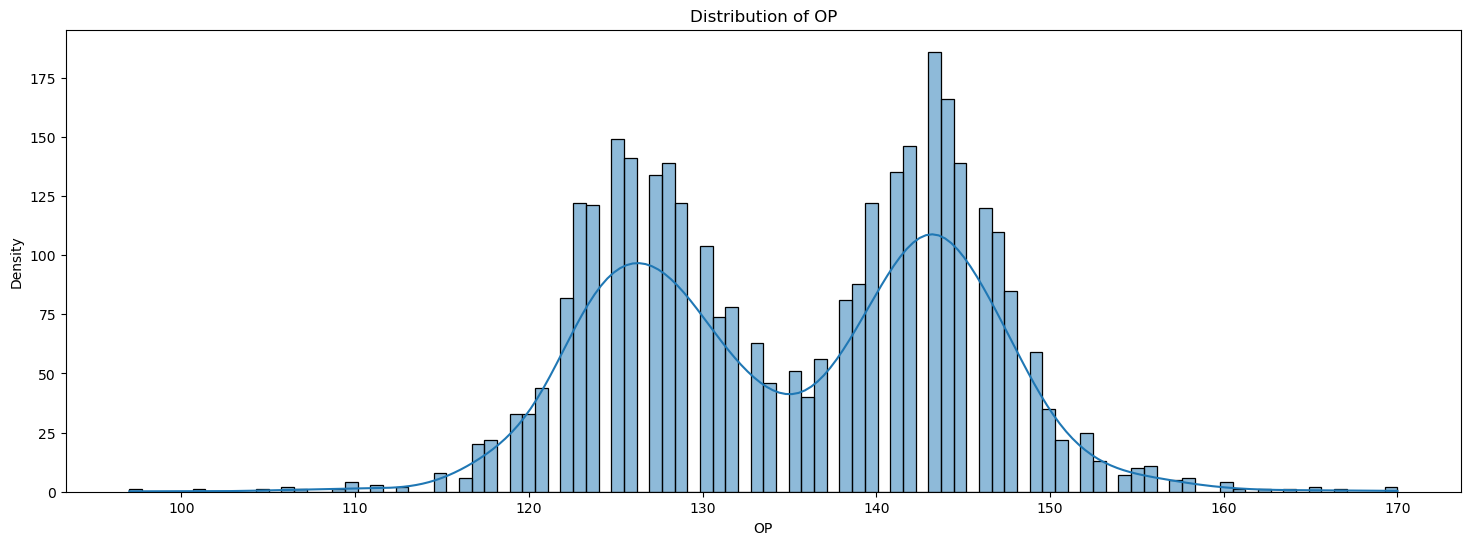

		Dataset 4: Satelite Weather


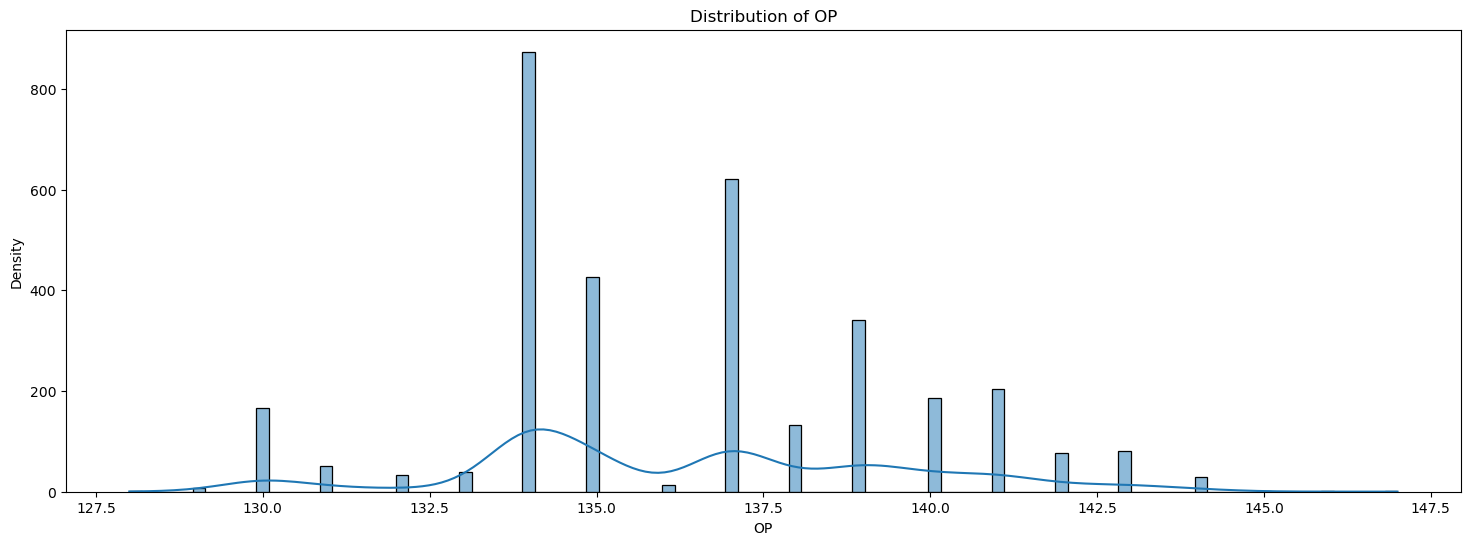

In [20]:
names = ['Diesease_C','Ground Pollution', 'Ground Weather', 'Satelite Weather']
for idx, df in enumerate([df_dieasease_C, df_ground_wea, df_ground_wea, df_sat_wea]):
    print("="*100)
    print(f"\t\tDataset {idx+1}: {names[idx]}")
    print("="*100)
    plot_target_distribution(df, 'OP')

# **Predict Ground Pollution**

In [21]:
X = df_ground_pol.drop('OP', axis=1)
y = df_ground_pol ['OP']

In [22]:
# Perform Normalization
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [23]:
np.random.seed(42)

In [24]:
def splitting_dataset(X, y, test_size=0.20, classifcation=False):
    from sklearn.model_selection import train_test_split

    assert X.shape[0] == y.shape[0], "Number of samples in X and y should be the same."


    if classifcation:
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0, stratify=y)
    else:
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

    # Check the shape of training and testing sets
    print("Training shape:", X_train.shape)
    print("Testing shape:", X_test.shape)

    return X_train, X_test, y_train, y_test

In [25]:
# lets split the dataset (80:20)
X_train, X_test, y_train, y_test = splitting_dataset(X, y , test_size=0.20)

Training shape: (2629, 16)
Testing shape: (658, 16)


In [26]:
#print(X)

In [27]:
X_train_org = X_train.copy()
X_test_org = X_test.copy()
y_train_org = y_train.copy()
y_test_org = y_test.copy()

In [28]:
# Import the required libraries
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from tqdm.auto import tqdm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge, BayesianRidge, ElasticNet, HuberRegressor, Lasso
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = X_train.copy()
X_train_std = scaler.fit_transform(X_train)

X_test_std = X_test.copy()
X_test_std = scaler.transform(X_test)

In [30]:
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)

In [31]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table

In [32]:
def train_OLS_model(X_train_selected, y_train_org, X_test_selected):
  # Reset index for y_train_org and X_train_selected
  y_train_org = y_train_org.reset_index(drop=True)
  X_train_selected = X_train_selected.reset_index(drop=True)

  # OLS model with selected features
  X_train_selected_const = sm.add_constant(X_train_selected)  # Add constant term
  model = sm.OLS(y_train_org, X_train_selected_const)
  model_fit = model.fit()

  # Summary of the model
  print(model_fit.summary())

  # Get fitted values and confidence intervals
  st, data, ss2 = summary_table(model_fit, alpha=0.05)
  fitted_values = data[:, 2]
  predict_min, predict_max = data[:, 4:6].T

  # For the predictions
  X_test_selected_const = sm.add_constant(X_test_selected)
  predictions = model_fit.get_prediction(X_test_selected_const)

  # Generate prediction summary frame
  pred_summary = predictions.summary_frame(alpha=0.05)  # 95% confidence intervals
  return pred_summary


In [33]:
pred_summary = train_OLS_model(X_train_std, y_train, X_test_std)

MissingDataError: exog contains inf or nans

In [ ]:
pred_summary

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, explained_variance_score

def evaluate_regression_model(model_name, model, X_train_std, y_train, y_true, y_pred):
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate R2 score
    r2 = r2_score(y_true, y_pred)

    # Calculate Mean Squared Logarithmic Error (MSLE)
    msle = mean_squared_log_error(y_true, y_pred)

    # Calculate Explained Variance Score
    explained_var_score = explained_variance_score(y_true, y_pred)

    # Perform k-fold cross-validation
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_train_std, y_train, cv=kfold, scoring='neg_mean_squared_error')

    # Calculate average cross-validation MSE
    avg_cv_mse = -cv_results.mean()

    # Create a dictionary to store the evaluation metrics
    evaluation_metrics = {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2,
        'MSLE': msle,
        'Explained Variance Score': explained_var_score,
        'Kfold-Cross-Validation-MSE': avg_cv_mse,
    }

    return pd.DataFrame.from_dict([evaluation_metrics]).set_index('Model')


# **Hyperparamater Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

def get_best_params_and_r2(model, param_grid, X_train_std, y_train):
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train_std, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Get the best R2 score
    best_r2_score = grid_search.best_score_

    # Print the results
    print("Best Parameters:", best_params)
    print("Best R2 Score:", best_r2_score)

    return best_params, best_r2_score

In [ ]:
MODELS = [
    ('LinearRegression', LinearRegression()),
    ('SVR', SVR()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('MLPRegressor', MLPRegressor()),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('Lasso', Lasso()),
    ('Ridge', Ridge()),
]

In [ ]:
# Create a dictionary to store the parameter grids for each model
param_grids = {
    'LinearRegression': {
        'fit_intercept': [True, False],
        },
     'SVR': {
         'C': [0.1, 1, 10],
         'gamma': [1, 0.1, 0.01, 0.001],
         'kernel': ['linear', 'rbf']
     },
    'DecisionTreeRegressor': {
        'max_depth': [3, 5, 7, 9],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 20],
        'bootstrap': [True, False]
    },
    'MLPRegressor': {
        'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'solver': ['sgd', 'adam'],
        'learning_rate': ['constant','adaptive']
    },
    'KNeighborsRegressor': {
        'n_neighbors': [5,10,15,20],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Lasso': {
        'alpha': [0.1, 1, 10, 100],
        'max_iter': [1000, 2000, 3000]
    },
    'Ridge': {
        'alpha': [0.1, 1, 10, 100],
        'max_iter': [1000, 2000, 3000]
    }
}


In [ ]:
def get_best_params_and_r2(model_name, model_instance, param_grid, X_train_std, y_train):
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model_instance, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train_std, y_train)

    # Get the best parameters
    best_params = grid_search.best_params_

    # Get the best R2 score
    best_r2_score = grid_search.best_score_

    # Print the results
    print(f"{model_name} - Best Parameters:", best_params)
    print(f"{model_name} - Best R2 Score:", best_r2_score)

    return best_params, best_r2_score

results = []

# Loop through each model
for model_name, model_instance in MODELS:
    print(f"Processing {model_name}...")
    param_grid = param_grids[model_name]
    best_params, best_r2 = get_best_params_and_r2(model_name, model_instance, param_grid, X_train_std, y_train)
    results.append({'Model': model_name, 'Best Parameters': best_params, 'Best R2 Score': best_r2})

results_df = pd.DataFrame(results)
results_df

In [ ]:
results_df.to_csv("D:\\Machine_Learning_Code_for_PHD\\Ground station Dataset\\Diesease_C Results\\bestparamsForDieseaseCDataset.csv", index=False)

In [ ]:
results_df = pd.read_csv("D:\\Machine_Learning_Code_for_PHD\\Ground station Dataset\\Diesease_C Results\\bestparamsForDieseaseCDataset.csv")
results_df

In [ ]:
# Create a list of model names and their corresponding instances
MODELS = [
    ('LinearRegression', lambda params: LinearRegression(**params)),
    ('SVR', lambda params: SVR(**params)),
    ('DecisionTreeRegressor', lambda params: DecisionTreeRegressor(**params)),
    ('RandomForestRegressor', lambda params: RandomForestRegressor(**params)),
    ('MLPRegressor', lambda params: MLPRegressor(**params)),
    ('KNeighborsRegressor', lambda params: KNeighborsRegressor(**params)),
    ('Lasso', lambda params: Lasso(**params)),
    ('Ridge', lambda params: Ridge(**params)),
]

In [ ]:
import ast

In [ ]:
MODELS_RES = []

# Loop through each model
for model_name, params in tqdm(zip(results_df['Model'], results_df['Best Parameters']), desc='Model Training', total=len(results_df)):
    print(f"Processing {model_name}...")

    # Get the corresponding model instance creation function from MODELS
    model_instance_creator = dict(MODELS)[model_name]

    # Create an instance of the model with the best parameters
    model = model_instance_creator(ast.literal_eval(params))
    print(model)

    model.fit(X_train_std, y_train) # fit the model
    y_pred = model.predict(X_test_std) # test the model

    res_ = evaluate_regression_model(model_name,model,X_train_std,y_train, y_test, y_pred) # evaluate the model
    MODELS_RES.append(res_) # append res in a list
    print("done.",)

In [ ]:
final_res = pd.concat(MODELS_RES).sort_values(by='RMSE')
print(tabulate(final_res, headers = 'keys', tablefmt = 'psql'))

In [ ]:
model_res = final_res.reset_index()
# Find the model with the lowest RMSE
best_model = model_res.loc[model_res['RMSE'].idxmin()]

print("Best Model (lowest RMSE):")
print(best_model)

In [ ]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals/Error'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

In [ ]:
model_names = [model[0] for model in MODELS]
index = model_names.index(best_model['Model'])
# regressor = MODELS[index][1]

In [ ]:
model_name = best_model['Model']
model_name

In [ ]:
best_params = results_df[results_df['Model'] == model_name]['Best Parameters'].values[0]
best_params = ast.literal_eval(best_params)
best_params

In [ ]:
# Get the corresponding model instance creation function from MODELS
regressor = dict(MODELS)[model_name](best_params)
regressor.fit(X_train_std, y_train)

In [ ]:
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs. Predicted values for {model_name}')
    plt.grid(True)
    plt.show()
    

plot_actual_vs_predicted(regressor.predict(X_test_std), y_test, regressor.__class__.__name__)

In [ ]:
explainer = shap.Explainer(regressor)
# Calculate Shap values
shap_values = explainer(X_train[0:1000])

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.initjs()

In [ ]:
shap.plots.force(shap_values[0:100])
shap.plots.bar(shap_values)
shap.plots.beeswarm(shap_values)